In [5]:
import qiskit

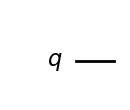

In [6]:
from qiskit import * ### Importing the library to our notebook
%matplotlib inline
q = QuantumRegister(1, 'q') ### (No. of qubits, name of the qubit(s))
qc=QuantumCircuit(q)
qc.draw(output='mpl') ### Drawing the quantum circuit


In [18]:
import numpy as np
from qiskit import QuantumCircuit

# 1. A quantum circuit for preparing the quantum state |000> + i |111>
qc_example = QuantumCircuit(3)
qc_example.h(0)          # generate superpostion
qc_example.p(np.pi/2,0)  # add quantum phase
qc_example.cx(0,1)       # 0th-qubit-Controlled-NOT gate on 1st qubit
qc_example.cx(0,2)       # 0th-qubit-Controlled-NOT gate on 2nd qubit

In [19]:
from qiskit import QuantumCircuit


def build_bell_circuit():
    """Returns a circuit putting 2 qubits in the Bell state."""
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.measure([0, 1], [0, 1])
    return qc


# Create the circuit
bell_circuit = build_bell_circuit()

# Use the internal .draw() to print the circuit
print(bell_circuit)

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


In [20]:
from qiskit import QuantumCircuit

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import CommutationAnalysis, CommutativeCancellation

circuit = QuantumCircuit(5)
# Quantum Instantaneous Polynomial Time example
circuit.cx(0, 1)
circuit.cx(2, 1)
circuit.cx(4, 3)
circuit.cx(2, 3)
circuit.z(0)
circuit.z(4)
circuit.cx(0, 1)
circuit.cx(2, 1)
circuit.cx(4, 3)
circuit.cx(2, 3)
circuit.cx(3, 2)

print(circuit)

pm = PassManager()
pm.append([CommutationAnalysis(), CommutativeCancellation()])
new_circuit = pm.run(circuit)
print(new_circuit)

          ┌───┐                    
q_0: ──■──┤ Z ├──■─────────────────
     ┌─┴─┐├───┤┌─┴─┐┌───┐          
q_1: ┤ X ├┤ X ├┤ X ├┤ X ├──────────
     └───┘└─┬─┘└───┘└─┬─┘     ┌───┐
q_2: ───────■────■────■────■──┤ X ├
     ┌───┐     ┌─┴─┐┌───┐┌─┴─┐└─┬─┘
q_3: ┤ X ├─────┤ X ├┤ X ├┤ X ├──■──
     └─┬─┘┌───┐└───┘└─┬─┘└───┘     
q_4: ──■──┤ Z ├───────■────────────
          └───┘                    
     ┌───┐
q_0: ┤ Z ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └─┬─┘
q_3: ──■──
     ┌───┐
q_4: ┤ Z ├
     └───┘


In [21]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicSimulator


###############################################################
# Make a quantum circuit for the GHZ state.
###############################################################
num_qubits = 5
qc = QuantumCircuit(num_qubits, num_qubits, name="ghz")

# Create a GHZ state
qc.h(0)
for i in range(num_qubits - 1):
    qc.cx(i, i + 1)
# Insert a barrier before measurement
qc.barrier()
# Measure all of the qubits in the standard basis
for i in range(num_qubits):
    qc.measure(i, i)

sim_backend = BasicSimulator()
job = sim_backend.run(transpile(qc, sim_backend), shots=1024)
result = job.result()
print("Basic simulator : ")
print(result.get_counts(qc))

Basic simulator : 
{'11111': 529, '00000': 495}


In [22]:

import math
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicSimulator


###############################################################
# Make a quantum circuit for state initialization.
###############################################################
circuit = QuantumCircuit(4, 4, name="initializer_circ")

desired_vector = [
    1 / math.sqrt(4) * complex(0, 1),
    1 / math.sqrt(8) * complex(1, 0),
    0,
    0,
    0,
    0,
    0,
    0,
    1 / math.sqrt(8) * complex(1, 0),
    1 / math.sqrt(8) * complex(0, 1),
    0,
    0,
    0,
    0,
    1 / math.sqrt(4) * complex(1, 0),
    1 / math.sqrt(8) * complex(1, 0),
]

circuit.initialize(desired_vector, [0, 1, 2, 3])

circuit.measure([0, 1, 2, 3], [0, 1, 2, 3])

print(circuit)

###############################################################
# Execute on a simulator backend.
###############################################################
shots = 10000

# Desired vector
print("Desired probabilities: ")
print([format(abs(x * x), ".3f") for x in desired_vector])

# Initialize on local simulator
sim_backend = BasicSimulator()
job = sim_backend.run(transpile(circuit, sim_backend), shots=shots)
result = job.result()

counts = result.get_counts(circuit)

qubit_strings = [format(i, "04b") for i in range(2**4)]
print("Probabilities from simulator: ")
print([format(counts.get(s, 0) / shots, ".3f") for s in qubit_strings])

     »
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
c: 4/»
     »
«     ┌────────────────────────────────────────────────────────────────────────────┐»
«q_0: ┤0                                                                           ├»
«     │                                                                            │»
«q_1: ┤1                                                                           ├»
«     │  Initialize(0.5j,0.35355,0,0,0,0,0,0,0.35355,0.35355j,0,0,0,0,0.5,0.35355) │»
«q_2: ┤2                                                                           ├»
«     │                                                                            │»
«q_3: ┤3                                                                           ├»
«     └────────────────────────────────────────────────────────────────────────────┘»
«c: 4/══════════════════════════════════════════════════════════════════════════════»
«                                                              

In [23]:

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import transpile
from qiskit.providers.basic_provider import BasicSimulator

###############################################################
# Set the backend name and coupling map.
###############################################################
coupling_map = [[0, 1], [0, 2], [1, 2], [3, 2], [3, 4], [4, 2]]
backend = BasicSimulator()

###############################################################
# Make a quantum program for quantum teleportation.
###############################################################
q = QuantumRegister(3, "q")
c0 = ClassicalRegister(1, "c0")
c1 = ClassicalRegister(1, "c1")
c2 = ClassicalRegister(1, "c2")
qc = QuantumCircuit(q, c0, c1, c2, name="teleport")

# Prepare an initial state
qc.u(0.3, 0.2, 0.1, q[0])

# Prepare a Bell pair
qc.h(q[1])
qc.cx(q[1], q[2])

# Barrier following state preparation
qc.barrier(q)

# Measure in the Bell basis
qc.cx(q[0], q[1])
qc.h(q[0])
qc.measure(q[0], c0[0])
qc.measure(q[1], c1[0])

# Apply a correction
qc.barrier(q)
qc.z(q[2]).c_if(c0, 1)
qc.x(q[2]).c_if(c1, 1)
qc.measure(q[2], c2[0])

###############################################################
# Execute.
# Experiment does not support feedback, so we use the simulator
###############################################################

# First version: not mapped
initial_layout = {q[0]: 0, q[1]: 1, q[2]: 2}
job = backend.run(
    transpile(qc, backend=backend, coupling_map=None, initial_layout=initial_layout), shots=1024
)

result = job.result()
print(result.get_counts(qc))

# Second version: mapped to 2x8 array coupling graph
job = backend.run(
    transpile(qc, backend=backend, coupling_map=coupling_map, initial_layout=initial_layout),
    shots=1024,
)
result = job.result()
print(result.get_counts(qc))

{'0 0 1': 254, '0 0 0': 256, '0 1 1': 259, '0 1 0': 238, '1 0 0': 7, '1 1 1': 5, '1 0 1': 3, '1 1 0': 2}
{'0 0 1': 270, '0 0 0': 262, '1 1 0': 6, '0 1 1': 230, '0 1 0': 247, '1 0 0': 4, '1 0 1': 3, '1 1 1': 2}


In [25]:
from qiskit import QuantumCircuit
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import CommutationAnalysis, CommutativeCancellation

# Create a quantum circuit
circuit = QuantumCircuit(5)

# Quantum Instantaneous Polynomial Time example
circuit.cx(0, 1)
circuit.cx(2, 1)
circuit.cx(4, 3)
circuit.cx(2, 3)
circuit.z(0)
circuit.z(4)
circuit.cx(0, 1)
circuit.cx(2, 1)
circuit.cx(4, 3)
circuit.cx(2, 3)
circuit.cx(3, 2)

print("Original Circuit:")
print(circuit)

# Create a PassManager and add passes for commutation analysis and cancellation
pm = PassManager()
pm.append([CommutationAnalysis(), CommutativeCancellation()])

# Apply the passes to the circuit
new_circuit = pm.run(circuit)

print("\nTransformed Circuit after Commutation Analysis and Commutative Cancellation:")
print(new_circuit)


Original Circuit:
          ┌───┐                    
q_0: ──■──┤ Z ├──■─────────────────
     ┌─┴─┐├───┤┌─┴─┐┌───┐          
q_1: ┤ X ├┤ X ├┤ X ├┤ X ├──────────
     └───┘└─┬─┘└───┘└─┬─┘     ┌───┐
q_2: ───────■────■────■────■──┤ X ├
     ┌───┐     ┌─┴─┐┌───┐┌─┴─┐└─┬─┘
q_3: ┤ X ├─────┤ X ├┤ X ├┤ X ├──■──
     └─┬─┘┌───┐└───┘└─┬─┘└───┘     
q_4: ──■──┤ Z ├───────■────────────
          └───┘                    

Transformed Circuit after Commutation Analysis and Commutative Cancellation:
     ┌───┐
q_0: ┤ Z ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └─┬─┘
q_3: ──■──
     ┌───┐
q_4: ┤ Z ├
     └───┘
